<a href="https://colab.research.google.com/github/Arrnv/major-ai/blob/main/cardiovascular_disease_eda_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv(r'/content/drive/My Drive/Colab Notebooks/Major/cardio_data_processed.csv')

In [ ]:
#show first few rows
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal


In [ ]:
#remove the column'bp_category_encoded'
df=df.drop(columns=['bp_category_encoded'],axis=1)

In [ ]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal


In [ ]:
#no of rows and columns in df
df.shape

(68205, 16)

In [ ]:
#check name and datatypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68205 entries, 0 to 68204
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           68205 non-null  int64  
 1   age          68205 non-null  int64  
 2   gender       68205 non-null  int64  
 3   height       68205 non-null  int64  
 4   weight       68205 non-null  float64
 5   ap_hi        68205 non-null  int64  
 6   ap_lo        68205 non-null  int64  
 7   cholesterol  68205 non-null  int64  
 8   gluc         68205 non-null  int64  
 9   smoke        68205 non-null  int64  
 10  alco         68205 non-null  int64  
 11  active       68205 non-null  int64  
 12  cardio       68205 non-null  int64  
 13  age_years    68205 non-null  int64  
 14  bmi          68205 non-null  float64
 15  bp_category  68205 non-null  object 
dtypes: float64(2), int64(13), object(1)
memory usage: 8.3+ MB


In [ ]:
#perform basic calculations in numeric columns
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
count,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000
mean,49972.410498,19462.667737,1.348625,164.372861,74.100688,126.434924,81.263925,1.363243,1.225174,0.087662,0.053134,0.803548,0.493688,52.823635,27.510513
std,28852.138290,2468.381854,0.476539,8.176756,14.288862,15.961685,9.143985,0.678080,0.571288,0.282805,0.224302,0.397317,0.499964,6.769909,6.026497
min,0.000000,10798.000000,1.000000,55.000000,11.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000,3.471784
25%,24991.000000,17656.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.875115
50%,50008.000000,19700.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000,26.346494
75%,74878.000000,21323.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,30.116213
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,180.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000,298.666667


In [ ]:
#check missing values
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
age_years      0
bmi            0
bp_category    0
dtype: int64

Text(0.5, 0, '1: Female, 2: Male')

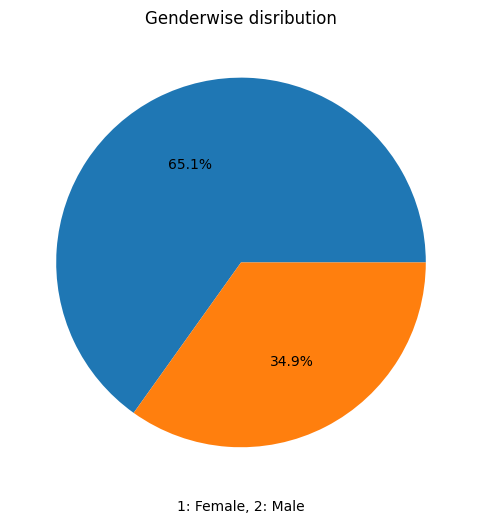

In [ ]:
#plotting a pie chart of Genderwise disribution
plt.figure(figsize=(10,6))
plt.pie(df['gender'].value_counts(),autopct='%1.1f%%')
plt.title("Genderwise disribution")
plt.xlabel('1: Female, 2: Male')

Text(0.5, 0, '0: Non-smoker,1: Smoker')

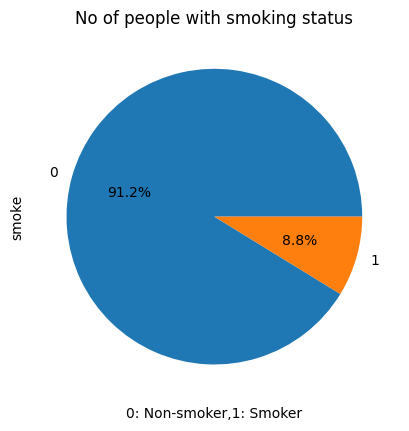

In [ ]:
#plotting a pie chart of No of people with smoking status
df['smoke'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title("No of people with smoking status")
plt.xlabel('0: Non-smoker,1: Smoker')

Text(0.5, 0, '0: Does not consume alcohol, 1: Consumes alcohol')

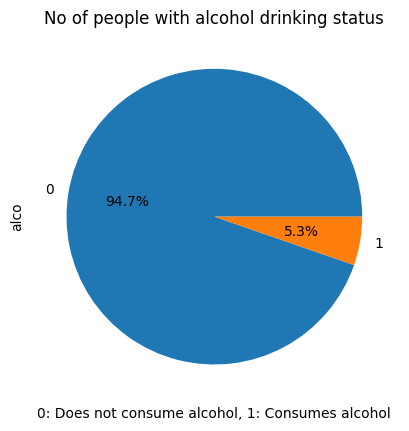

In [ ]:
#plotting a pie chart of No of people with drinking status
df['alco'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title("No of people with alcohol drinking status")
plt.xlabel('0: Does not consume alcohol, 1: Consumes alcohol')

Text(0.5, 1.0, 'No of people in each B.P Category')

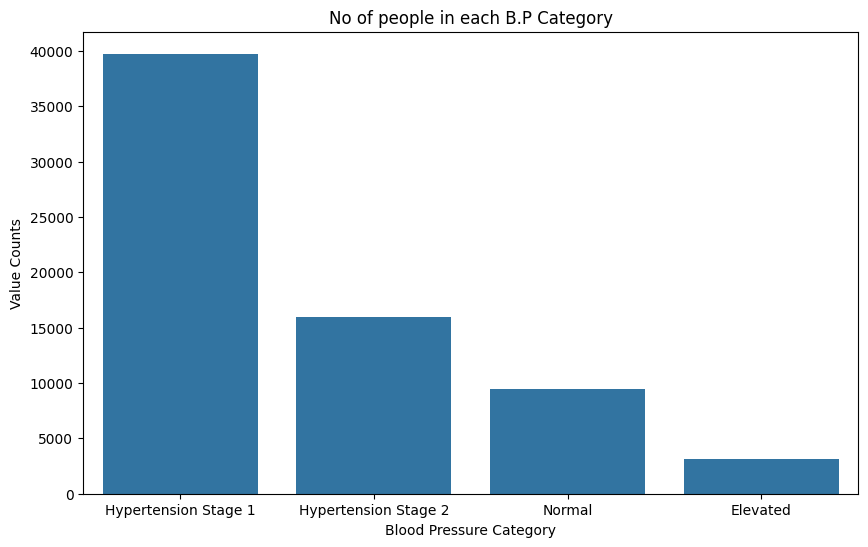

In [ ]:
#plotting a countplot of No of people in each B.P Categories
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='bp_category')
plt.xlabel("Blood Pressure Category")
plt.ylabel("Value Counts")
plt.title("No of people in each B.P Category")

Text(0.5, 0, 'Cholesterol Levels(1:Normal, 2:Above Normal, 3:Well Above Normal)')

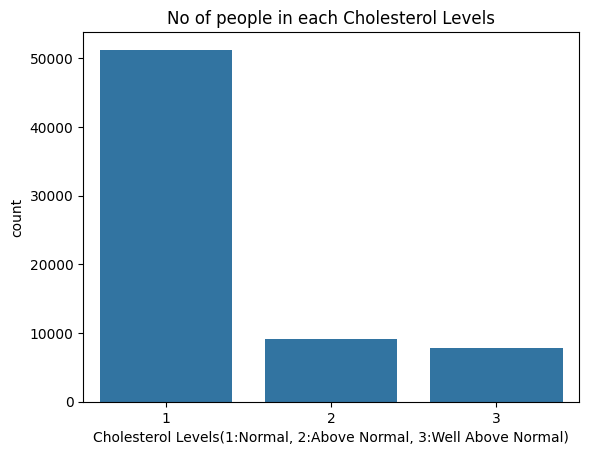

In [ ]:
#plotting a countplot of No of people with Cholesterol Levels
sns.countplot(data=df, x='cholesterol')
plt.title("No of people in each Cholesterol Levels")
plt.xlabel('Cholesterol Levels(1:Normal, 2:Above Normal, 3:Well Above Normal)')

Text(0.5, 0, 'Glucose Levels(1:Normal, 2:Above Normal, 3:Well Above Normal)')

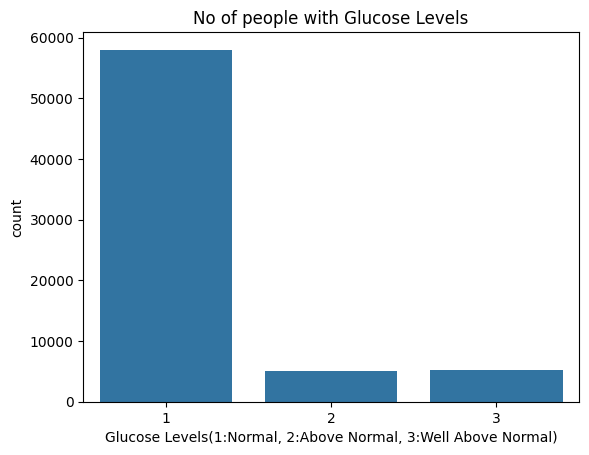

In [ ]:
#plotting a countplot of No of people with Glucose Levels
sns.countplot(data=df, x='gluc')
plt.title("No of people with Glucose Levels")
plt.xlabel('Glucose Levels(1:Normal, 2:Above Normal, 3:Well Above Normal)')

Text(0.5, 0, '0: Not physically active, 1: Physically active')

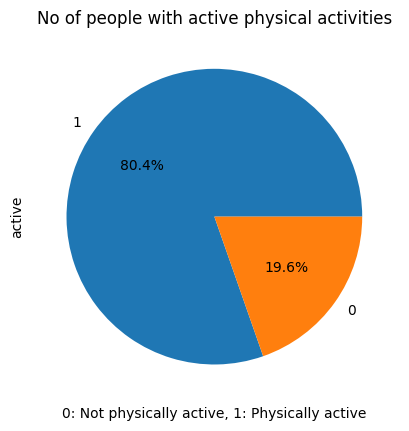

In [ ]:
#plotting a pie chart of No of people with active physical activities
df['active'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title("No of people with active physical activities")
plt.xlabel('0: Not physically active, 1: Physically active')

Text(0.5, 0, '0: Absence, 1: Presence')

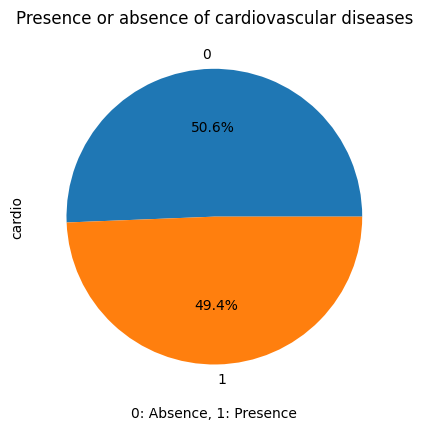

In [ ]:
#plotting a pie chart of No of people with persense or absense of cardiovascular diseases
df['cardio'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title("Presence or absence of cardiovascular diseases")
plt.xlabel('0: Absence, 1: Presence')

# Ordinal Encoding
Ordinal encoding is used to convert categorical data with ordered relationships into numerical values.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
OE=OrdinalEncoder(categories=[['Normal','Elevated','Hypertension Stage 1','Hypertension Stage 2']])

In [ ]:
OE.fit(df[['bp_category']])

OrdinalEncoder(categories=[['Normal', 'Elevated', 'Hypertension Stage 1',
                            'Hypertension Stage 2']])

In [ ]:
df['bp_encoded']=OE.transform(df[['bp_category']])

In [ ]:
df=df.drop(columns='bp_category',axis=1)

In [ ]:
df.sample(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_encoded
65461,95917,18830,2,174,100.0,160,100,1,1,0,0,1,1,51,33.029462,3.0
63987,93735,18100,2,166,62.0,140,90,1,1,0,0,1,1,49,22.499637,3.0
53535,78365,19642,1,160,100.0,140,90,1,1,0,0,0,0,53,39.062500,3.0
61057,89474,18173,1,158,78.0,120,80,1,1,0,0,1,1,49,31.244993,2.0
20241,29675,19790,1,157,62.0,120,80,1,1,0,0,1,0,54,25.153150,2.0
24818,36347,18943,1,170,68.0,130,90,1,1,0,0,1,0,51,23.529412,2.0
33536,49181,19825,1,163,80.0,120,80,2,1,0,1,0,0,54,30.110279,2.0
51689,75671,21132,1,167,72.0,120,70,3,1,0,0,0,1,57,25.816630,1.0
15355,22496,18860,2,165,53.0,160,100,1,1,0,0,0,1,51,19.467401,3.0
39572,58034,23291,1,168,88.0,130,80,3,1,0,0,1,1,63,31.179138,2.0


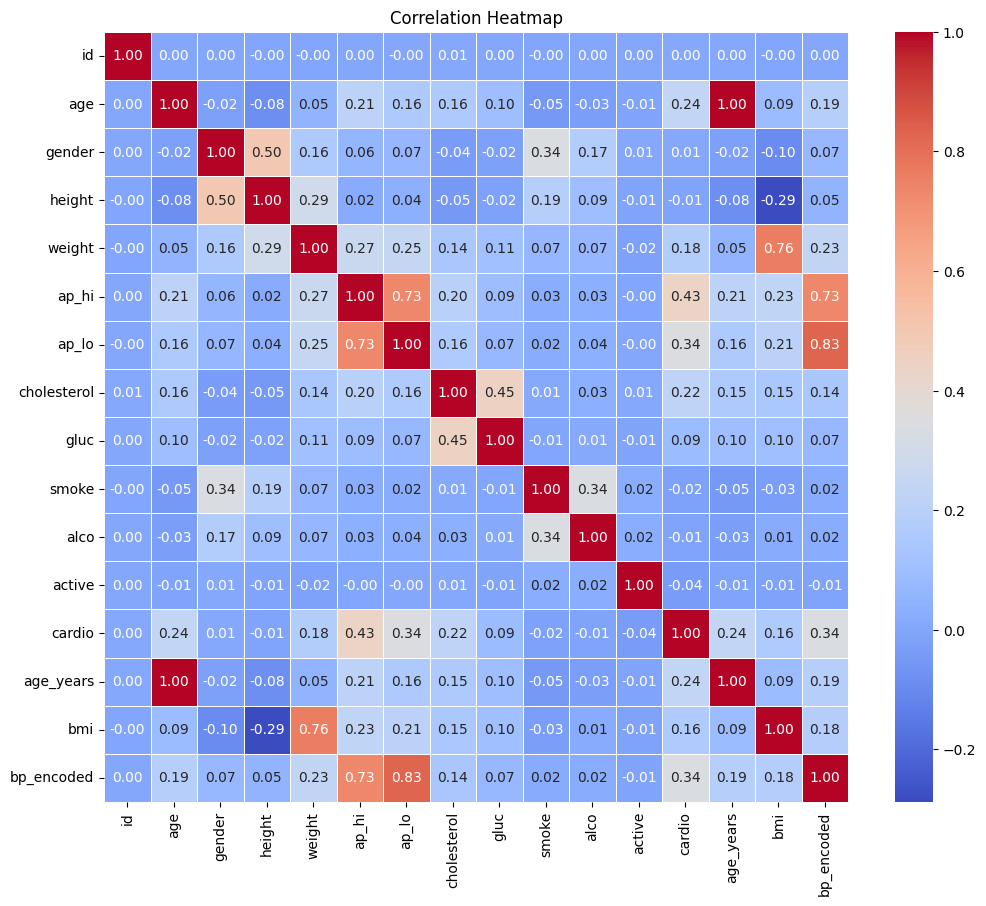

In [ ]:
#creating a heat map
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# seperate the feature variables & target variable
x=df.drop(columns='cardio',axis=1)
y=df['cardio']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

# Standardization
This process scales each feature such that it has a mean of 0 and a standard deviation of 1

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
#created an instance of the "StandardScaler" class called "SS"
SS=StandardScaler()

In [ ]:
#fitted SS on the training dataset
SS.fit(x_train)

StandardScaler()

In [ ]:
#transformed both training and test datasets
x_train_transformed=SS.transform(x_train)
x_test_transformed=SS.transform(x_test)

In [ ]:
print(x_test_transformed[:5])  # Print the first 5 elements of the NumPy array


[[-0.14889781  0.62692101  1.36791265  0.68550791 -0.63769355  0.22757534
  -0.13799014  2.42666091  3.13338292  3.22354335  4.22310982  0.49355404
   0.61817905 -0.84168247  0.09878396]
 [-1.16927263  0.64999255 -0.73104083  0.07441644 -0.98885198 -0.40029647
  -1.23196673 -0.53347425 -0.39213323 -0.31021764 -0.23679233  0.49355404
   0.61817905 -0.91785967 -1.00257447]
 [-0.4997015   0.38851506  1.36791265  0.07441644 -0.98885198 -0.40029647
  -0.13799014 -0.53347425 -0.39213323 -0.31021764 -0.23679233  0.49355404
   0.32303172 -0.91785967  0.09878396]
 [ 0.4531684  -1.91135352  1.36791265  0.44107132 -0.28653512 -0.40029647
  -0.13799014 -0.53347425 -0.39213323 -0.31021764 -0.23679233 -2.0261206
  -1.89057319 -0.45300216  0.09878396]
 [ 1.63622071  0.70706426 -0.73104083 -1.6366397  -0.91862029  1.48331897
   0.95598646  2.42666091 -0.39213323 -0.31021764 -0.23679233  0.49355404
   0.76575271 -0.12465574  1.2001424 ]]


# Logistic Regression
It is a machine learning algorithm used for binary classification problems, where the goal is to predict one of two possible outcomes (usually represented as 0 and 1).

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
#created an instance of the "LogisticRegression" class called "LR"
LR=LogisticRegression()

In [ ]:
#Training the model
LR.fit(x_train_transformed,y_train)

LogisticRegression()

In [ ]:
#made predictions on test dataset
y_pred=LR.predict(x_test_transformed)

In [ ]:
#calculated the accuracy of the model
accuracy_score(y_pred,y_test)

0.7324976174767246

In [ ]:
print(LR.predict([[-0.14889781,0.62692101 , 1.36791265 , 0.68550791 ,-0.63769355  ,0.22757534, -0.13799014 , 2.42666091,  3.13338292,  3.22354335,  4.22310982,  0.49355404,
   0.61817905, -0.84168247,  0.09878396], [-1.16927263, 0.64999255, -0.73104083,  0.07441644, -0.98885198, -0.40029647,-1.23196673, -0.53347425, -0.39213323, -0.31021764, -0.23679233,  0.49355404,0.61817905, -0.91785967, -1.00257447]]))

[1 0]


# SVM

In [ ]:
# Import the required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, f1_score, matthews_corrcoef
from sklearn.metrics import precision_score, auc, roc_auc_score, roc_curve, precision_recall_curve, classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from scipy.stats import randint

from imblearn.over_sampling import SMOTE
from collections import Counter

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

SVC Classifier:
Accuracy: 0.7381423649292573
Confusion Matrix:
[[5399 1447]
 [2125 4670]]
F1 Score: 0.7233581164807931
Precision: 0.7634461337256825
Recall: 0.6872700515084621
MCC: 0.4784543389389056
AUC-ROC: 0.7922872521661779
PR-AUC: 0.7922872521661779


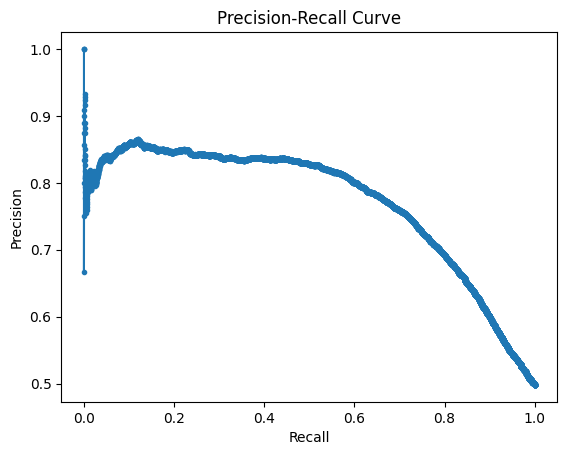

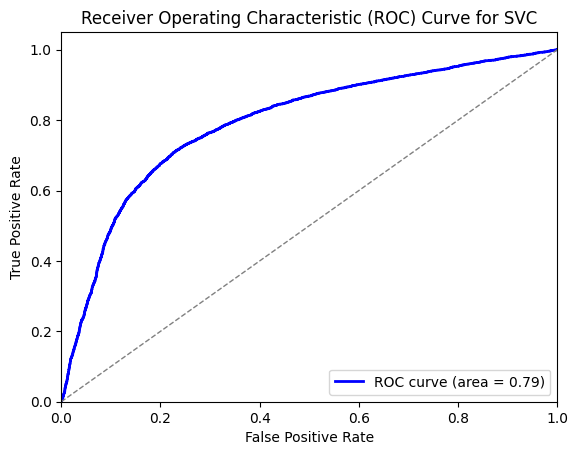

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, matthews_corrcoef, roc_auc_score, precision_recall_curve, roc_curve
import matplotlib.pyplot as plt

# SVM with Default Parameters and probability = True
svc = SVC(kernel='rbf', probability=True, random_state=100)

# Fit the model
svc.fit(x_train_transformed, y_train)

# Predict
svc_predictions = svc.predict(x_test_transformed)

# Compute accuracy
svc_accuracy = accuracy_score(y_test, svc_predictions)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, svc_predictions)

# Compute F1 score
f1 = f1_score(y_test, svc_predictions)

# Compute precision and recall
precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])

# Compute Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_test, svc_predictions)

# Compute AUC-ROC
roc_auc = roc_auc_score(y_test, svc.decision_function(x_test_transformed))

# Compute precision-recall curve and PR-AUC
precision_curve, recall_curve, _ = precision_recall_curve(y_test, svc.decision_function(x_test_transformed))
pr_auc = roc_auc_score(y_test, svc.decision_function(x_test_transformed))

# Display metrics
print("SVC Classifier:")
print("Accuracy:", svc_accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("MCC:", mcc)
print("AUC-ROC:", roc_auc)
print("PR-AUC:", pr_auc)

# Plot precision-recall curve
plt.plot(recall_curve, precision_curve, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Compute ROC curve for SVC
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, svc.decision_function(x_test_transformed))

# Compute AUC for SVC
roc_auc_svc = roc_auc_score(y_test, svc.decision_function(x_test_transformed))

# Plot ROC curve for SVC
plt.figure()
plt.plot(fpr_svc, tpr_svc, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVC')
plt.legend(loc="lower right")
plt.show()


# Random forest

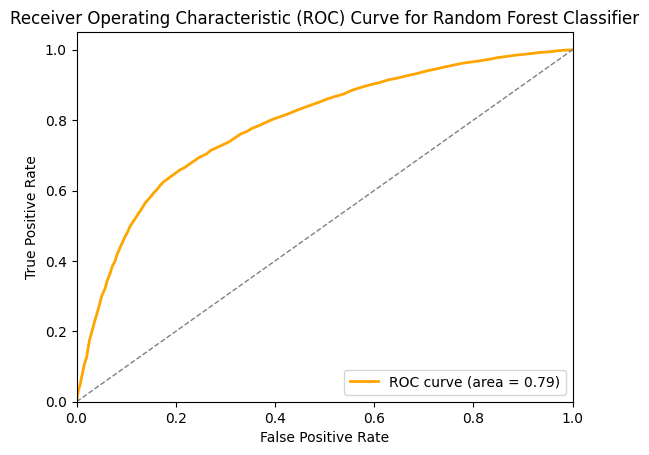

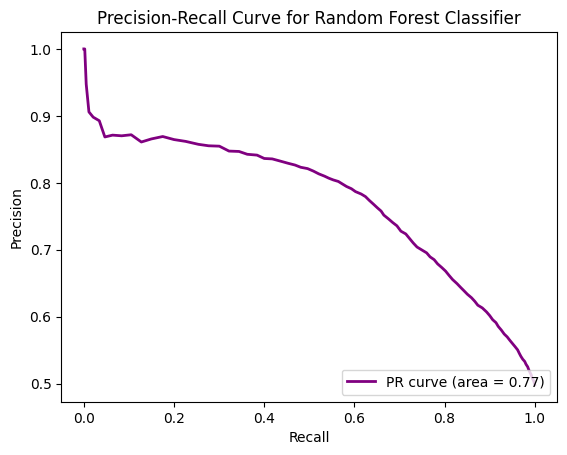

Random Forest Classifier Metrics:
Confusion Matrix:
[[5152 1694]
 [2077 4718]]
F1 Score: 0.7144695994548346
Accuracy: 0.7235539916428414
Precision: 0.7358078602620087
Recall: 0.6943340691685063
Matthews Correlation Coefficient (MCC): 0.447690875583358
AUC-ROC: 0.7873116155548204
AUC-PR: 0.7746490320644311


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, matthews_corrcoef, roc_curve, auc, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Define and train Random Forest classifier with default parameters
rfc = RandomForestClassifier(n_jobs=-1, random_state=100)
rfc.fit(x_train_transformed, y_train)

# Predict
rfc_predictions = rfc.predict(x_test_transformed)

# Compute confusion matrix for Random Forest classifier
conf_matrix_rfc = confusion_matrix(y_test, rfc_predictions)

# Compute F1 score for Random Forest classifier
f1_rfc = f1_score(y_test, rfc_predictions)

# Compute accuracy for Random Forest classifier
accuracy_rfc = accuracy_score(y_test, rfc_predictions)

# Compute precision for Random Forest classifier
precision_rfc = precision_score(y_test, rfc_predictions)

# Compute recall for Random Forest classifier
recall_rfc = recall_score(y_test, rfc_predictions)

# Compute Matthews Correlation Coefficient (MCC) for Random Forest classifier
mcc_rfc = matthews_corrcoef(y_test, rfc_predictions)

# Plot ROC curve for Random Forest classifier
fpr_rfc, tpr_rfc, _ = roc_curve(y_test, rfc.predict_proba(x_test_transformed)[:, 1])
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)

plt.figure()
plt.plot(fpr_rfc, tpr_rfc, color='orange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rfc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve for Random Forest classifier
precision_rfc_curve, recall_rfc_curve, _ = precision_recall_curve(y_test, rfc.predict_proba(x_test_transformed)[:, 1])
pr_auc_rfc = auc(recall_rfc_curve, precision_rfc_curve)

plt.figure()
plt.plot(recall_rfc_curve, precision_rfc_curve, color='purple', lw=2, label='PR curve (area = %0.2f)' % pr_auc_rfc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

# Display metrics for Random Forest classifier
print("Random Forest Classifier Metrics:")
print("Confusion Matrix:")
print(conf_matrix_rfc)
print("F1 Score:", f1_rfc)
print("Accuracy:", accuracy_rfc)
print("Precision:", precision_rfc)
print("Recall:", recall_rfc)
print("Matthews Correlation Coefficient (MCC):", mcc_rfc)
print("AUC-ROC:", roc_auc_rfc)
print("AUC-PR:", pr_auc_rfc)


# Bagging

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging SVM:
Accuracy: 0.7392419910563741
              precision    recall  f1-score   support

           0       0.72      0.79      0.75      6846
           1       0.77      0.68      0.72      6795

    accuracy                           0.74     13641
   macro avg       0.74      0.74      0.74     13641
weighted avg       0.74      0.74      0.74     13641



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging MLP:
Accuracy: 0.7378491312953596
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      6846
           1       0.76      0.69      0.73      6795

    accuracy                           0.74     13641
   macro avg       0.74      0.74      0.74     13641
weighted avg       0.74      0.74      0.74     13641



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Decision Tree:
Accuracy: 0.7024411700021993
              precision    recall  f1-score   support

           0       0.68      0.76      0.72      6846
           1       0.73      0.65      0.68      6795

    accuracy                           0.70     13641
   macro avg       0.70      0.70      0.70     13641
weighted avg       0.70      0.70      0.70     13641



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging KNN:
Accuracy: 0.6942306282530606
              precision    recall  f1-score   support

           0       0.69      0.72      0.70      6846
           1       0.70      0.67      0.68      6795

    accuracy                           0.69     13641
   macro avg       0.69      0.69      0.69     13641
weighted avg       0.69      0.69      0.69     13641



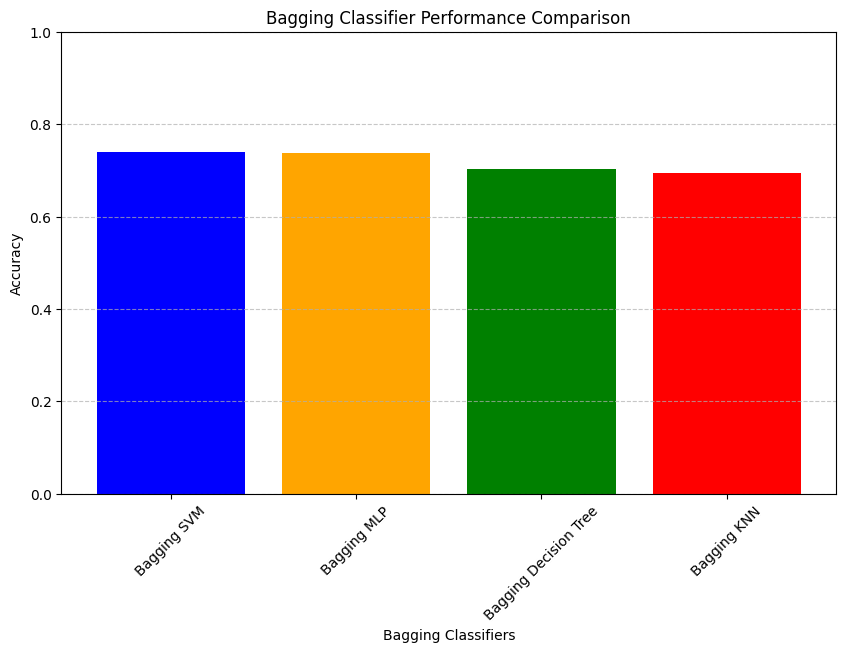

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Define base models
svm_base_model = SVC()
mlp_base_model = MLPClassifier(max_iter=1000)
dt_base_model = DecisionTreeClassifier()
knn_base_model = KNeighborsClassifier()

# Train and evaluate Bagging classifier with each base model
bagging_svm = BaggingClassifier(base_estimator=svm_base_model)
bagging_mlp = BaggingClassifier(base_estimator=mlp_base_model)
bagging_dt = BaggingClassifier(base_estimator=dt_base_model)
bagging_knn = BaggingClassifier(base_estimator=knn_base_model)

# List of Bagging classifiers
bagging_classifiers = [("Bagging SVM", bagging_svm),
                       ("Bagging MLP", bagging_mlp),
                       ("Bagging Decision Tree", bagging_dt),
                       ("Bagging KNN", bagging_knn)]

# Initialize lists to store accuracies and variables to store accuracy values
classifiers = []
accuracies = []
bagging_svmac = 0
bagging_mlpac = 0
bagging_dtac = 0
bagging_knnac = 0

# Train and evaluate Bagging classifiers
for name, model in bagging_classifiers:
    model.fit(x_train_transformed, y_train)
    predictions = model.predict(x_test_transformed)
    accuracy = accuracy_score(y_test, predictions)
    classifiers.append(name)
    accuracies.append(accuracy)
    print(f"{name}:")
    print("Accuracy:", accuracy)
    print(classification_report(y_test, predictions))
    if name == "Bagging SVM":
        bagging_svmac = accuracy
    elif name == "Bagging MLP":
        bagging_mlpac = accuracy
    elif name == "Bagging Decision Tree":
        bagging_dtac = accuracy
    elif name == "Bagging KNN":
        bagging_knnac = accuracy

# Plot bar graph
plt.figure(figsize=(10, 6))
plt.bar(classifiers, accuracies, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Bagging Classifiers')
plt.ylabel('Accuracy')
plt.title('Bagging Classifier Performance Comparison')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
